In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# https://www.kaggle.com/rtatman/188-million-us-wildfires
# https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

# A = 0.0   -  0.25 acres
# B = 0.26  -  9.9 acres
# C = 10.0  -  99.9 acres
# D = 100   -  299 acres
# E = 300   -  999 acres
# F = 1000  -  4999 acres
# G = 5000  +  acres

# Preprocessing

In [2]:
fires_df = pd.read_csv('joined.csv')
temp_df = fires_df[~np.isnan(fires_df['AverageTemperature'])] # only deal with fires that have a temperature
ml_df = temp_df.drop(['STATE', 'AverageTemperatureUncertainty'], axis=1)
ml_df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,Month,AverageTemperature
0,2005,Miscellaneous,0.10,A,40.036944,-121.005833,2,8.689
1,2004,Lightning,0.25,A,38.933056,-120.404444,5,17.627
2,2004,Debris Burning,0.10,A,38.984167,-120.735556,5,17.627
3,2004,Lightning,0.10,A,38.559167,-119.913333,6,21.407
4,2004,Lightning,0.10,A,38.559167,-119.933056,6,21.407


In [3]:
# One Hot Encoding
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(ml_df[['STAT_CAUSE_DESCR']])

ohe_df = pd.DataFrame(enc.transform(ml_df[['STAT_CAUSE_DESCR']]).toarray(), columns=enc.get_feature_names(['STAT_CAUSE_DESCR']))
ml_df.reset_index(drop=True, inplace=True)

for col in ohe_df:
    ml_df[col] = ohe_df[col]

ml_df.drop(['STAT_CAUSE_DESCR'], axis=1, inplace=True)
ml_df.head()

,FIRE_YEAR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,Month,AverageTemperature,STAT_CAUSE_DESCR_Arson,STAT_CAUSE_DESCR_Campfire,STAT_CAUSE_DESCR_Children,STAT_CAUSE_DESCR_Debris Burning,STAT_CAUSE_DESCR_Equipment Use,STAT_CAUSE_DESCR_Fireworks,STAT_CAUSE_DESCR_Lightning,STAT_CAUSE_DESCR_Miscellaneous,STAT_CAUSE_DESCR_Missing/Undefined,STAT_CAUSE_DESCR_Powerline,STAT_CAUSE_DESCR_Railroad,STAT_CAUSE_DESCR_Smoking,STAT_CAUSE_DESCR_Structure
0,2005,0.10,A,40.036944,-121.005833,2,8.689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2004,0.25,A,38.933056,-120.404444,5,17.627,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2004,0.10,A,38.984167,-120.735556,5,17.627,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2004,0.10,A,38.559167,-119.913333,6,21.407,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2004,0.10,A,38.559167,-119.933056,6,21.407,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
ml_df.drop(['FIRE_YEAR'], axis=1, inplace=True)
ml_df.head()

,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,Month,AverageTemperature,STAT_CAUSE_DESCR_Arson,STAT_CAUSE_DESCR_Campfire,STAT_CAUSE_DESCR_Children,STAT_CAUSE_DESCR_Debris Burning,STAT_CAUSE_DESCR_Equipment Use,STAT_CAUSE_DESCR_Fireworks,STAT_CAUSE_DESCR_Lightning,STAT_CAUSE_DESCR_Miscellaneous,STAT_CAUSE_DESCR_Missing/Undefined,STAT_CAUSE_DESCR_Powerline,STAT_CAUSE_DESCR_Railroad,STAT_CAUSE_DESCR_Smoking,STAT_CAUSE_DESCR_Structure
0,0.10,A,40.036944,-121.005833,2,8.689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.25,A,38.933056,-120.404444,5,17.627,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.10,A,38.984167,-120.735556,5,17.627,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.10,A,38.559167,-119.913333,6,21.407,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.10,A,38.559167,-119.933056,6,21.407,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
ml_df = ml_df[ml_df['FIRE_SIZE_CLASS'] != 'A'] # uncomment to remove A

regr_df = ml_df.drop(['FIRE_SIZE_CLASS'], axis=1) # y = FIRE_SIZE
clas_df = ml_df.drop(['FIRE_SIZE'], axis=1) # y = FIRE_SIZE_CLASS

In [6]:
# Split
X_train, X_test, y_train, y_test = train_test_split(clas_df.drop(['FIRE_SIZE_CLASS'], axis=1), clas_df[['FIRE_SIZE_CLASS']], test_size=0.25, random_state=2)

In [7]:
# Scaling
lst = ['LATITUDE', 'LONGITUDE', 'Month', 'AverageTemperature']
       
scaler = StandardScaler().fit(X_train[lst])
X_train[lst] = scaler.transform(X_train[lst])
X_test[lst] = scaler.transform(X_test[lst])

# ML

In [8]:
# Can we predict the fire size?

# Other models like SVM and Logistic Regression were tried. 
# LogisticRegression didn't converge given 1000 iterations. 
# SVM didn't finish running given time. 

## KNN

In [9]:
neigh = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)
neigh.fit(X_train, y_train['FIRE_SIZE_CLASS'])
y_preds = neigh.predict(X_test)

print('accuracy:', (y_preds == y_test['FIRE_SIZE_CLASS']).sum() / len(y_preds))
print(balanced_accuracy_score(y_test['FIRE_SIZE_CLASS'], y_preds))
pd.Series(y_preds).value_counts()

# normal
# 0.5874881152550946, 0.2571179425806845
# dropped A
# 0.7373172875543932, 0.2343876909711021

accuracy: 0.7373172875543932
0.2343876909711021


B    235654
C     34584
D      3289
E      1575
F       930
G       427
dtype: int64

In [10]:
neigh._tree

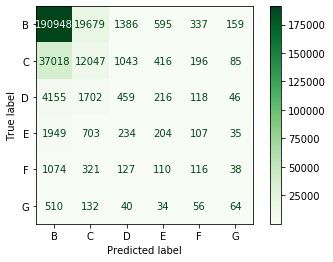

In [11]:
plot_confusion_matrix(neigh, X_test, y_test['FIRE_SIZE_CLASS'], values_format='d', cmap='Greens');

## Random Forest

In [12]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
rf.fit(X_train, y_train['FIRE_SIZE_CLASS'])
y_preds = rf.predict(X_test)

print((y_preds == y_test['FIRE_SIZE_CLASS']).sum() / len(y_preds))
print(balanced_accuracy_score(y_test['FIRE_SIZE_CLASS'], y_preds))
pd.Series(y_preds).value_counts()

# normal
# 0.610955510072175, 0.2522913472090115
# dropped A
# 0.7572587616970329, 0.22390785162584162

0.7572587616970329
0.22390785162584162


B    247054
C     25786
D      1958
E       923
F       498
G       240
dtype: int64